Importing all the libraries

In [ ]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,StratifiedKFold
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
sns.set()
%matplotlib inline

Loading the data using pandas dataframe

In [ ]:
data=pd.read_csv('/content/data.csv')

Analysing and preprocessing of the data

In [ ]:
data.head()

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR
0,140,38,850,0,165,8543,64,8.3,8200,17.1,38.0,0.95,3012,13.3
1,140,30,900,0,174,8336,60,7.8,8061,16.0,59.3,0.95,2771,12.5
2,140,30,900,0,174,9361,65,7.8,8061,16.0,59.3,0.95,3067,16.9
3,140,30,950,0,175,9110,69,8.3,7922,15.7,66.9,0.95,3130,16.5
4,140,30,950,0,175,9310,67,8.3,7922,15.7,66.9,0.95,2991,17.4


In [ ]:
print(data.columns)
print(data.shape)

Index(['Stage Spacing', 'bbl/ft', 'Well Spacing', 'Dip', 'Thickness',
       'Lateral Length', 'Injection Rate', 'Porosity', 'ISIP',
       'Water Saturation', 'Percentage of LG', 'Pressure Gradient',
       'Proppant Loading', 'EUR'],
      dtype='object')
(506, 14)


ploting the graps to find the relationships between different columns of the data

In [ ]:
col=['Stage Spacing', 'bbl/ft', 'Well Spacing', 'Dip', 'Thickness',
       'Lateral Length', 'Injection Rate', 'Porosity', 'ISIP',
       'Water Saturation', 'Percentage of LG', 'Pressure Gradient',
       'Proppant Loading', 'EUR']

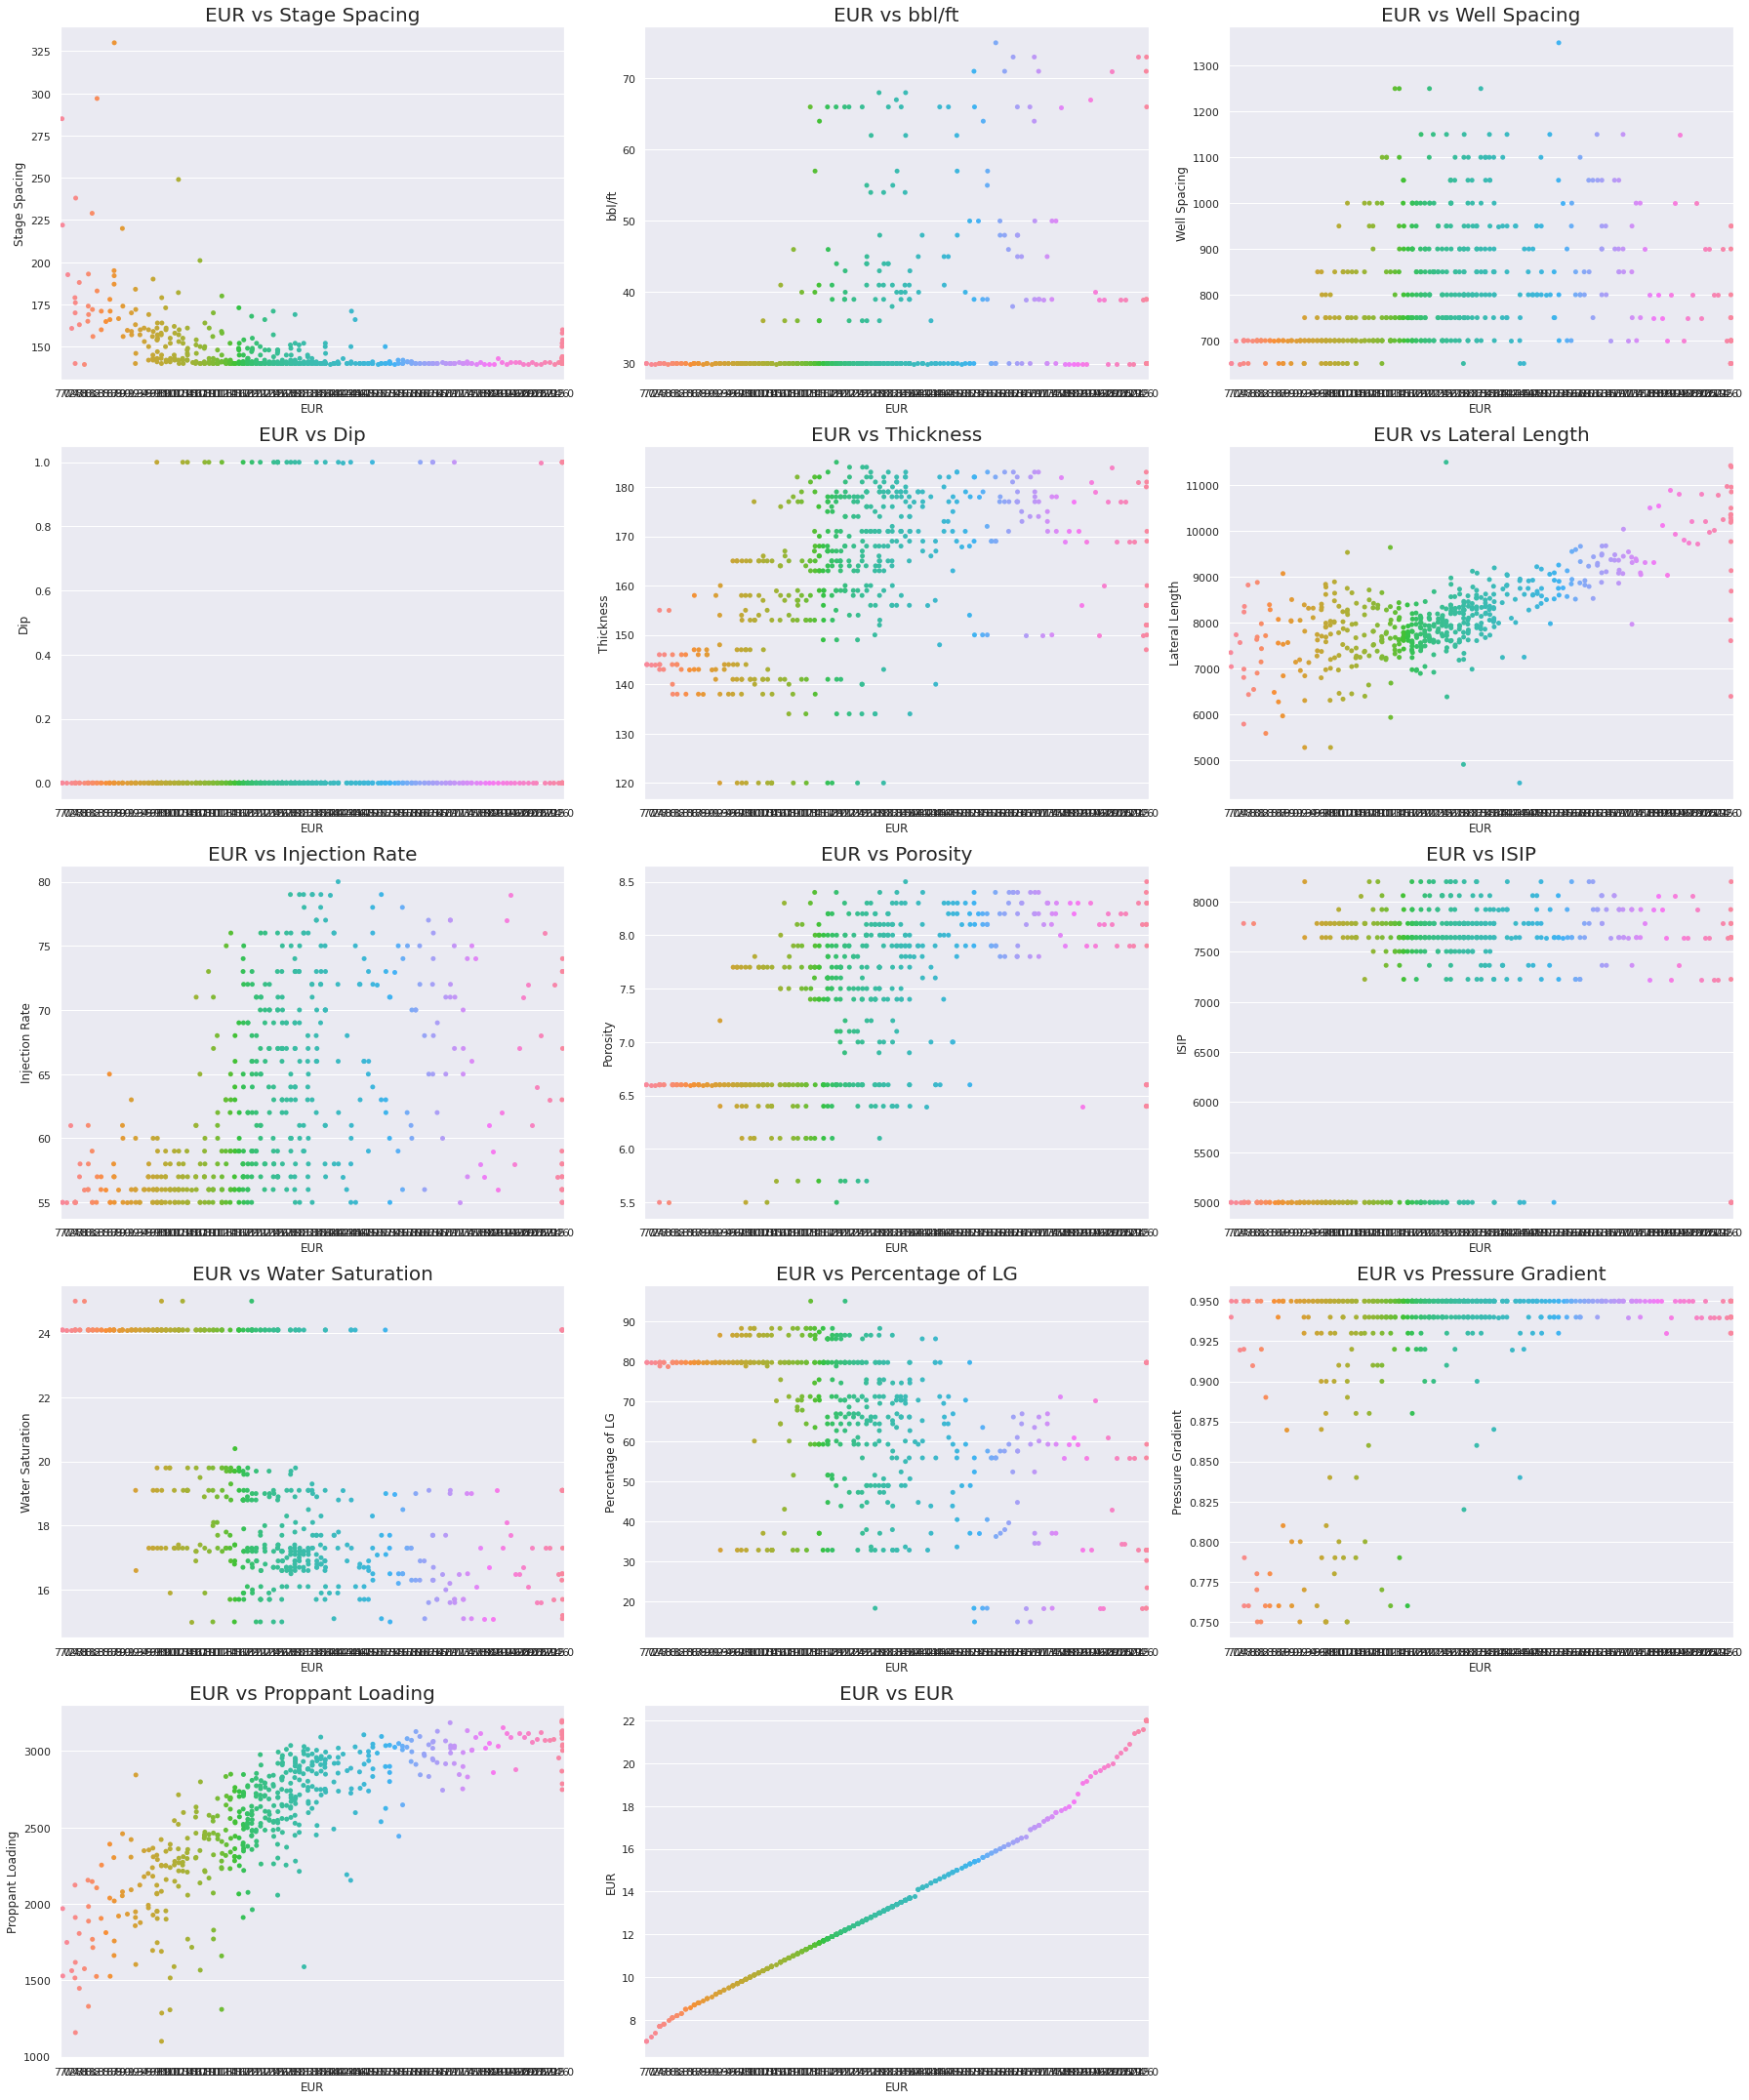

In [ ]:
#bivarient analysis
col01=['Stage Spacing', 'bbl/ft', 'Well Spacing', 'Dip', 'Thickness','Lateral Length', 'Injection Rate', 'Porosity', 'ISIP','Water Saturation', 'Percentage of LG', 'Pressure Gradient',
       'Proppant Loading', 'EUR']
plt.figure(figsize=(25,30))
for i in range(len(col01)):
  plt.subplot(5,3,i+1)
  sns.stripplot(x=data['EUR'],y=data[col01[i]])
  plt.title(f'EUR vs {col[i]}',fontsize=20)
  plt.tight_layout()

To find if there is any missing value in our data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Stage Spacing      506 non-null    int64  
 1   bbl/ft             506 non-null    int64  
 2   Well Spacing       506 non-null    int64  
 3   Dip                506 non-null    int64  
 4   Thickness          506 non-null    int64  
 5   Lateral Length     506 non-null    int64  
 6   Injection Rate     506 non-null    int64  
 7   Porosity           506 non-null    float64
 8   ISIP               506 non-null    int64  
 9   Water Saturation   506 non-null    float64
 10  Percentage of LG   506 non-null    float64
 11  Pressure Gradient  506 non-null    float64
 12  Proppant Loading   506 non-null    int64  
 13  EUR                506 non-null    float64
dtypes: float64(5), int64(9)
memory usage: 55.5 KB


Checking for outliers

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

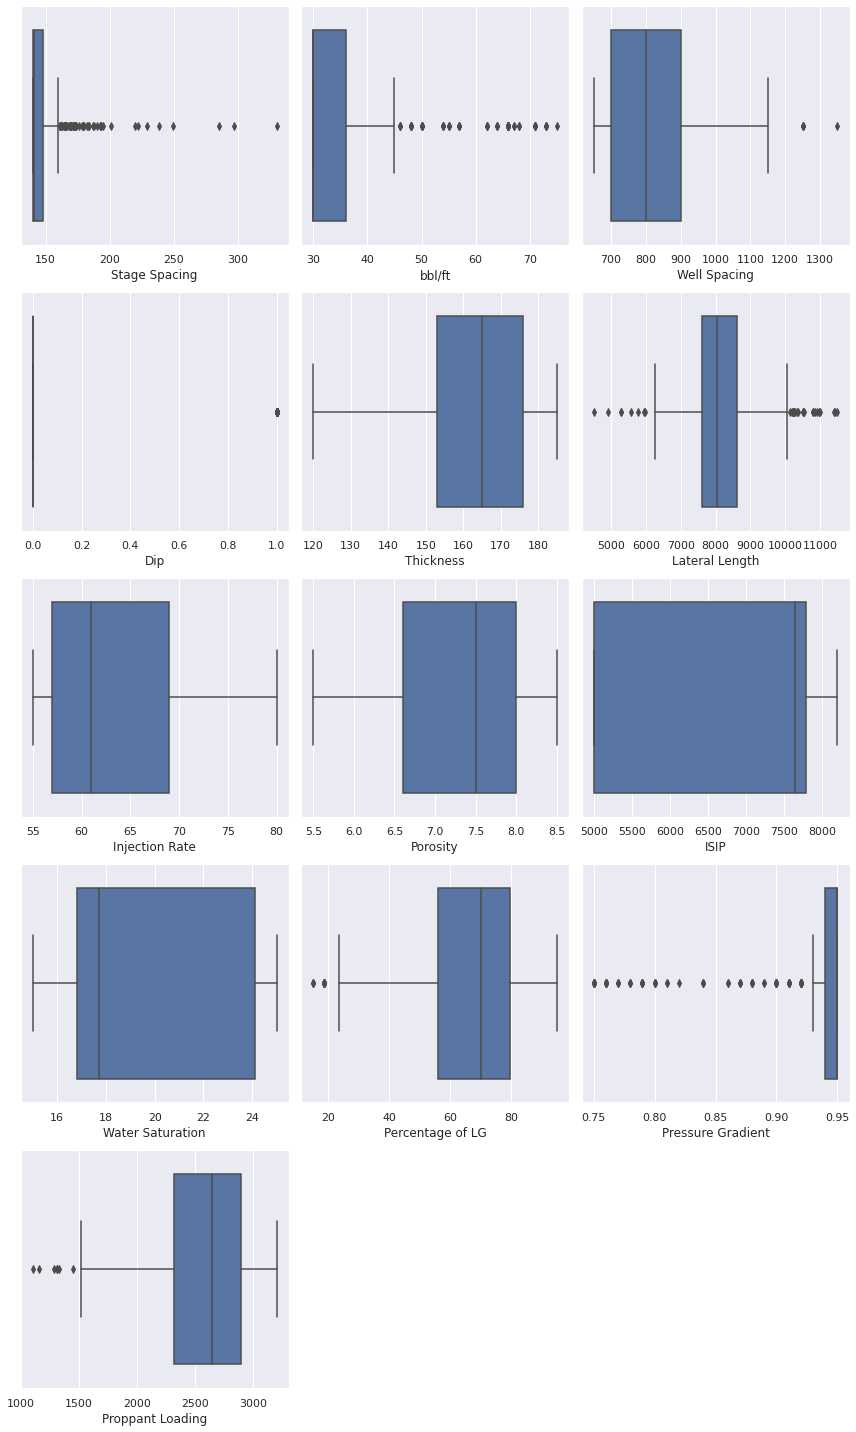

In [ ]:
x_val=x.columns.values
plt.figure(figsize=(12,20))
for i in range(len(x_val)):
  plt.subplot(5,3,i+1)
  sns.boxplot(x[x_val[i]])
  plt.tight_layout()

In [ ]:
Col1=['Stage Spacing', 'bbl/ft', 'Well Spacing', 'Dip', 'Thickness','Lateral Length', 'Injection Rate', 'Porosity', 'ISIP','Water Saturation', 'Percentage of LG', 'Pressure Gradient',
       'Proppant Loading']

In [ ]:
# percentile=x[col].quantile([0.01,0.98]).values
# x[col][x[col]<=percentile[0]]=percentile[0]
# x[col][x[col]>=percentile[1]]=percentile[1]

Normalizing the dataset

For encoding of data

In [ ]:
 from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,power_transform

In [ ]:
Oe=OrdinalEncoder()
def ordinal_encoder(df,column):
  df[column]=Oe.fit_transform(df[column])
  return df

In [ ]:
data=data.dropna()

In [ ]:
data=ordinal_encoder(data,['Stage Spacing', 'bbl/ft', 'Well Spacing', 'Dip', 'Thickness','Lateral Length', 'Injection Rate', 'Porosity', 'ISIP','Water Saturation', 'Percentage of LG', 'Pressure Gradient',
       'Proppant Loading','EUR'])

In [ ]:
data.head()

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading,EUR
0,0.0,2.0,4.0,0.0,23.0,320.0,9.0,18.0,8.0,16.0,9.0,18.0,363.0,57.0
1,0.0,0.0,5.0,0.0,32.0,279.0,5.0,13.0,7.0,6.0,23.0,18.0,264.0,49.0
2,0.0,0.0,5.0,0.0,32.0,400.0,10.0,13.0,7.0,6.0,23.0,18.0,384.0,89.0
3,0.0,0.0,6.0,0.0,33.0,383.0,14.0,18.0,6.0,4.0,31.0,18.0,405.0,87.0
4,0.0,0.0,6.0,0.0,33.0,395.0,12.0,18.0,6.0,4.0,31.0,18.0,353.0,93.0


Diving the dependent and the independent variable

In [ ]:
def preprocessing(df):
  df=df.copy()
  le=LabelEncoder()
  x=df.drop('EUR',axis=1)
  y=df['EUR']
  return x,y

In [ ]:
x,y=preprocessing(data)

In [ ]:
x.head()

,Stage Spacing,bbl/ft,Well Spacing,Dip,Thickness,Lateral Length,Injection Rate,Porosity,ISIP,Water Saturation,Percentage of LG,Pressure Gradient,Proppant Loading
0,0.0,2.0,4.0,0.0,23.0,320.0,9.0,18.0,8.0,16.0,9.0,18.0,363.0
1,0.0,0.0,5.0,0.0,32.0,279.0,5.0,13.0,7.0,6.0,23.0,18.0,264.0
2,0.0,0.0,5.0,0.0,32.0,400.0,10.0,13.0,7.0,6.0,23.0,18.0,384.0
3,0.0,0.0,6.0,0.0,33.0,383.0,14.0,18.0,6.0,4.0,31.0,18.0,405.0
4,0.0,0.0,6.0,0.0,33.0,395.0,12.0,18.0,6.0,4.0,31.0,18.0,353.0


In [ ]:
y.head()

0    57.0
1    49.0
2    89.0
3    87.0
4    93.0
Name: EUR, dtype: float64

Finding corelation(how much one feature is contributing towards the another feature)

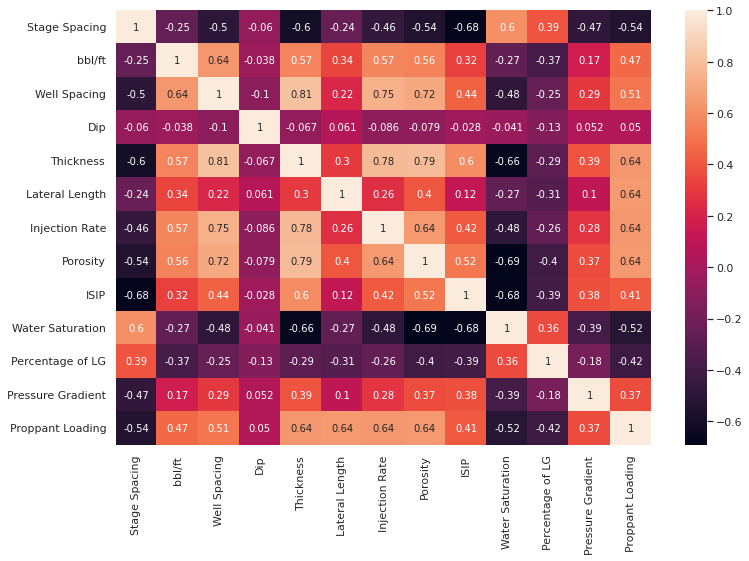

In [ ]:
x_corr=x.corr()
plt.figure(figsize=(12,8))
sns.heatmap(x_corr,annot=True)

Conclusion-No column is highly corelated.Therefore,we will not drop any column

Using smote library to balance the data 

In [ ]:
# from imblearn.over_sampling import SMOTE
# smote=SMOTE(random_state=42)
# x_res,y_res=smote.fit_resample(x,y)
# x_new=pd.DataFrame(x_res,columns=x.columns)
# y_new=pd.DataFrame(y_res,columns=['EUR'])

In [ ]:
#checkskewness
x.skew()

Stage Spacing        2.218922
bbl/ft               2.256576
Well Spacing         0.896764
Dip                  3.405904
Thickness           -0.238131
Lateral Length       0.014402
Injection Rate       0.592776
Porosity             0.024800
ISIP                -0.140298
Water Saturation    -0.176201
Percentage of LG    -0.729837
Pressure Gradient   -2.813041
Proppant Loading    -0.041629
dtype: float64

In [ ]:
#remove skewness
x_new=power_transform(x,method='yeo-johnson')
x_new=pd.DataFrame(x_new,columns=x.columns)

In [ ]:
x_new.skew()

Stage Spacing        0.436632
bbl/ft               1.104528
Well Spacing        -0.017383
Dip                  3.405904
Thickness           -0.354220
Lateral Length      -0.273633
Injection Rate      -0.102191
Porosity            -0.178266
ISIP                -0.305820
Water Saturation    -0.284922
Percentage of LG    -0.553514
Pressure Gradient   -1.651043
Proppant Loading    -0.283385
dtype: float64

Feature scaling

In [ ]:
scaler=StandardScaler()
x_new=scaler.fit_transform(x_new)
x_new=pd.DataFrame(x_new,columns=x.columns)

Spiliting the data into training and testing dataset

In [ ]:
X_Train, X_Test, Y_Train, Y_Test =train_test_split(x_new,y,test_size=0.3,random_state=42)

Import ML models

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier

Training multiple models

In [ ]:
models={
    "LogisticRegression":LogisticRegression(),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "ExtraTreesClassifier":ExtraTreesClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "XGBClassifier":XGBClassifier(),
    "LGBMClassifier":LGBMClassifier()
}

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [ ]:
# skf=StratifiedKFold(n_splits=5,shuffle=True)
# Score=[]
# CVS=[]
# MODEL=[]
# for name,model in models.items():
#   print(name)
#   MODEL.append(name)
#   model.fit(X_Train,Y_Train)
#   y_pred=model.predict(X_Test)
#   print('\n')
#   ac=accuracy_score(Y_Test,y_pred)
#   Score.append(ac)
#   print('Accuracy Score',ac)
#   print('\n')
#   print('Score',model.score(X_Test,Y_Test))
#   print('\n')

  


LogisticRegression


Accuracy Score 0.02631578947368421


Score 0.02631578947368421


DecisionTreeClassifier


Accuracy Score 0.06578947368421052


Score 0.06578947368421052


ExtraTreesClassifier


Accuracy Score 0.019736842105263157


Score 0.019736842105263157


RandomForestClassifier


Accuracy Score 0.046052631578947366


Score 0.046052631578947366


XGBClassifier


Accuracy Score 0.019736842105263157


Score 0.019736842105263157


LGBMClassifier


Accuracy Score 0.03289473684210526


Score 0.03289473684210526


